# Quick start (local)

> Minimal example of MLForecast

## Main concepts

The main component of mlforecast is the `MLForecast` class, which abstracts away:

* Feature engineering and model training through `MLForecast.fit`
* Feature updates and multi step ahead predictions through `MLForecast.predict`

## Data format

The data is expected to be a pandas dataframe in long format, that is, each row represents an observation of a single serie at a given time, with at least three columns:

* `id_col`: column that identifies each serie.
* `target_col`: column that has the series values at each timestamp.
* `time_col`: column that contains the time the series value was observed. These are usually timestamps, but can also be consecutive integers.

Here we present an example using the classic Box & Jenkins airline data, which measures monthly totals of international airline passengers from 1949 to 1960.
Source: Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. Third Edition. Holden-Day. Series G.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [ ]:
df['unique_id'].value_counts()

AirPassengers    144
Name: unique_id, dtype: int64

Here the `unique_id` column has the same value for all rows because this is a single time series, you can have multiple time series by stacking them together and having a column that differentiates them.

We also have the `ds` column that contains the timestamps, in this case with a monthly frequency, and the `y` column that contains the series values in each timestamp. 

## Modeling

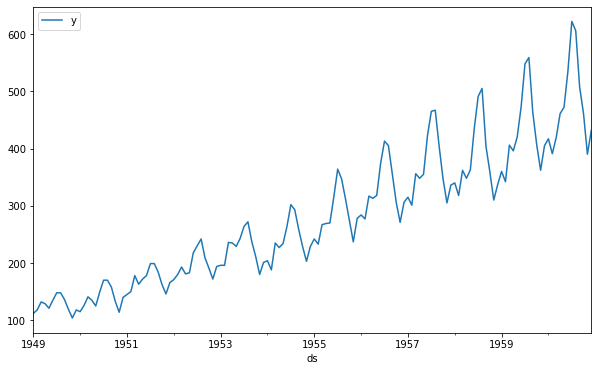

In [ ]:
df.plot(x='ds', y='y', figsize=(10, 6));

We can see that the serie has a clear trend, so we can take the first difference, i.e. take each value and subtract the value at the previous month. This can be achieved by setting `differences=[1]`.

We can then train a linear regression using the value from the same month at the previous year (lag 12) as a feature, this is done by passing `lags=[12]`.

In [ ]:
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression

In [ ]:
fcst = MLForecast(
    models=LinearRegression(),
    freq='MS',  # our serie has a monthly frequency
    lags=[12],
    differences=[1],
)
fcst.fit(df)

MLForecast(models=[LinearRegression], freq=<MonthBegin>, lag_features=['lag12'], date_features=[], num_threads=1)

The previous line computed the features and trained the model, so now we're ready to compute our forecasts.

## Forecasting

Compute the forecast for the next 12 months

In [ ]:
preds = fcst.predict(12)
preds

,unique_id,ds,LinearRegression
0,AirPassengers,1961-01-01,444.656555
1,AirPassengers,1961-02-01,417.470734
2,AirPassengers,1961-03-01,446.903046
3,AirPassengers,1961-04-01,491.014130
4,AirPassengers,1961-05-01,502.622223
5,AirPassengers,1961-06-01,568.751465
6,AirPassengers,1961-07-01,660.044312
7,AirPassengers,1961-08-01,643.343323
8,AirPassengers,1961-09-01,540.666687
9,AirPassengers,1961-10-01,491.462708


## Visualize results

We can visualize what our prediction looks like.

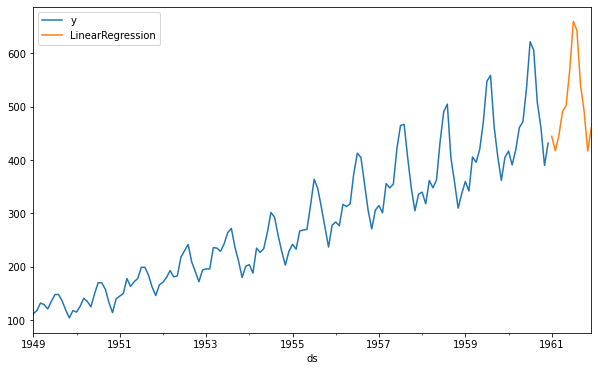

In [ ]:
pd.concat([df, preds]).set_index('ds').plot(figsize=(10, 6));

And that's it! You've trained a linear regression to predict the air passengers for 1961.